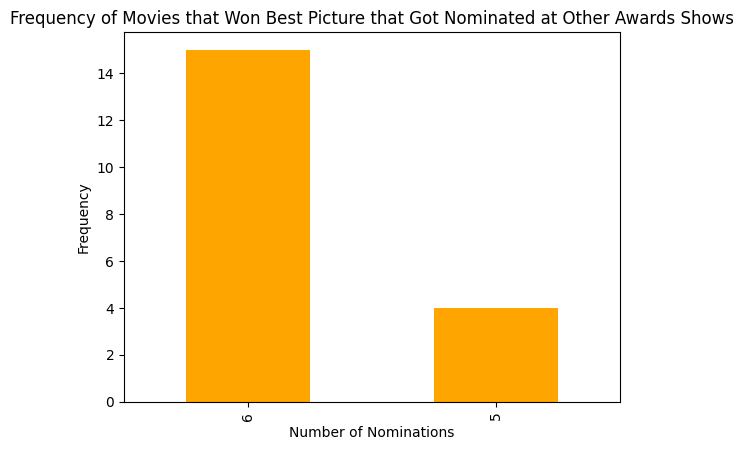

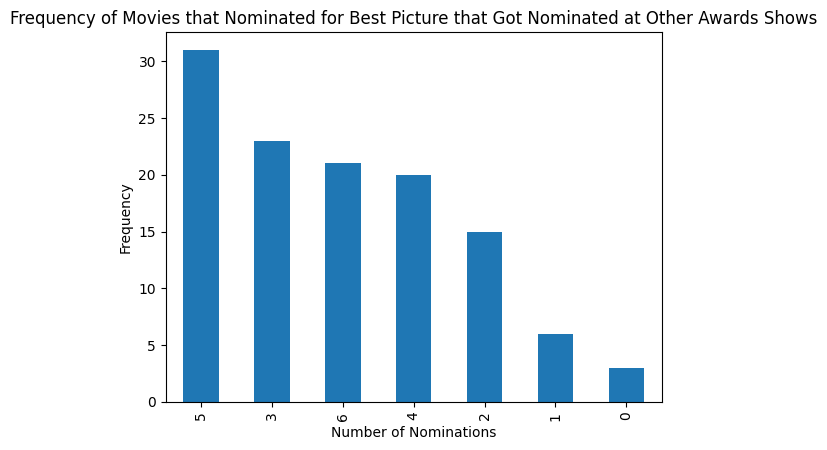

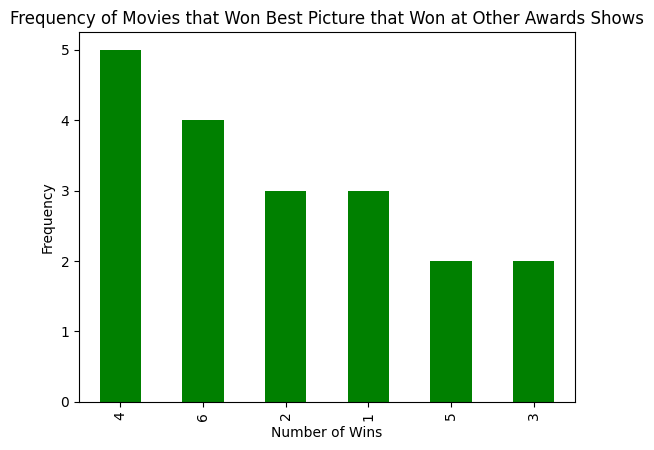

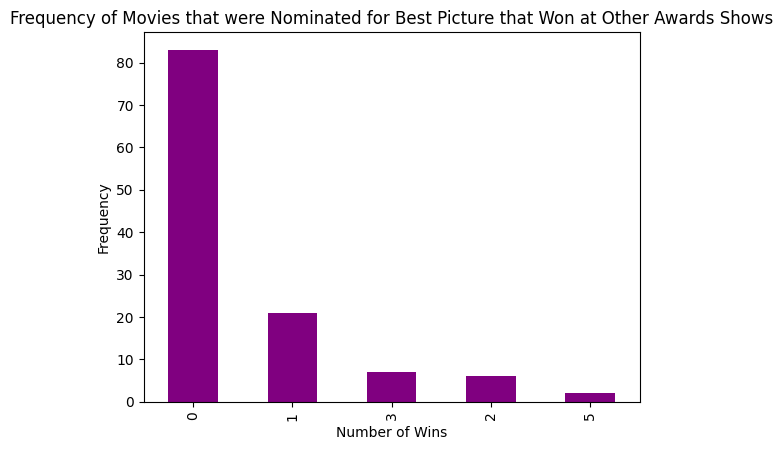

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
bestPicture = pd.read_csv('oscardatafile.csv')
filteredPicture = bestPicture[bestPicture['Year'] >= 2000]
isWinner = 'Winner'

filteredPicture.to_csv('cleanedBestPicture.csv', index=False)

winnerFrame = filteredPicture[filteredPicture[isWinner] == 1]


nominatedFrame = filteredPicture[filteredPicture[isWinner] == 0]

winnerFrame['Total Nominations Other Shows'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('Number of Nominations')
plt.ylabel('Frequency')
plt.title('Frequency of Movies that Won Best Picture that Got Nominated at Other Awards Shows')
plt.show()

nominatedFrame['Total Nominations Other Shows'].value_counts().plot(kind='bar')
plt.xlabel('Number of Nominations')
plt.ylabel('Frequency')
plt.title('Frequency of Movies that Nominated for Best Picture that Got Nominated at Other Awards Shows')
plt.show()

winnerFrame['Total Wins Other Shows'].value_counts().plot(kind='bar', color='green')
plt.xlabel('Number of Wins')
plt.ylabel('Frequency')
plt.title('Frequency of Movies that Won Best Picture that Won at Other Awards Shows')
plt.show()

nominatedFrame['Total Wins Other Shows'].value_counts().plot(kind='bar', color='purple')
plt.xlabel('Number of Wins')
plt.ylabel('Frequency')
plt.title('Frequency of Movies that were Nominated for Best Picture that Won at Other Awards Shows')
plt.show()








/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


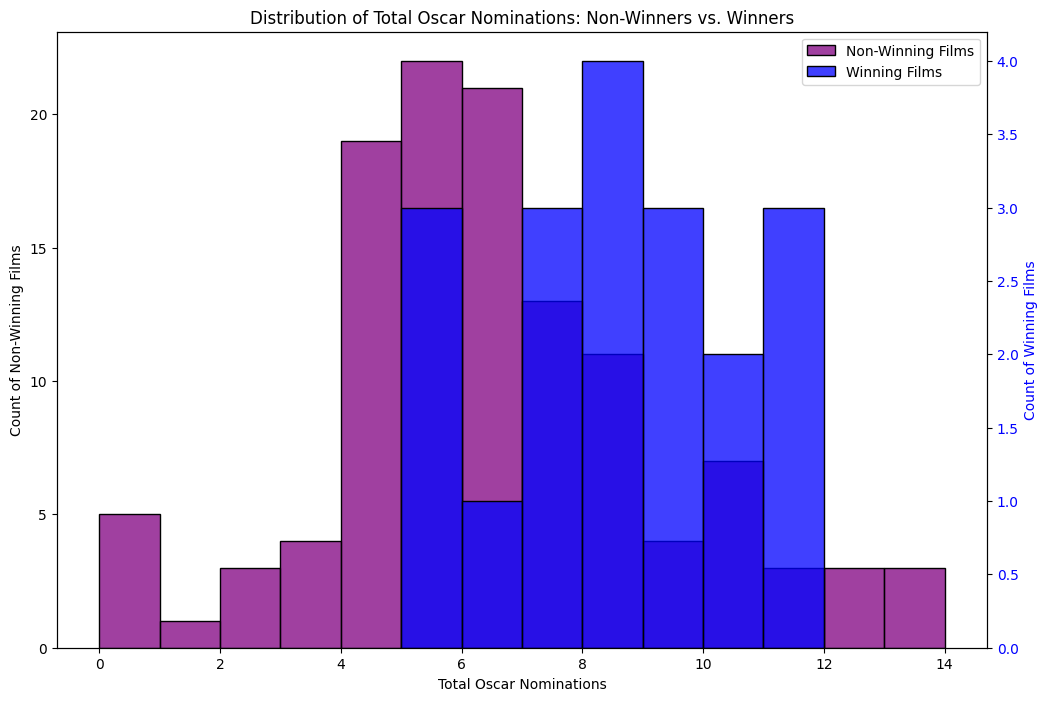

We can reject the null hypothesis since the 0.0007602373017743401 is less than .005
Mann-Whitney U statistic: 1671.5
P-value: 0.0007602373017743401


In [3]:
#Combined Graphs go here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('cleanedBestPicture.csv')

# Filter data for winners and non-winners
winner_data = data[data["Winner"] == 1]
non_winner_data = data[data["Winner"] == 0]

# Create figure and axis objects with shared x-axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot histogram on ax1 for non-winners in purple
sns.histplot(data=non_winner_data, x="Oscarstat_totalnoms", color="purple", binwidth=1, ax=ax1, label="Non-Winning Films")
ax1.set_xlabel('Total Oscar Nominations')
ax1.set_ylabel('Count of Non-Winning Films')
ax1.set_title('Distribution of Total Oscar Nominations: Non-Winners vs. Winners')

# Create second y-axis
ax2 = ax1.twinx()

# Plot histogram for just the winners on ax2 in blue
sns.histplot(data=winner_data, x="Oscarstat_totalnoms", color="blue", binwidth=1, ax=ax2, label="Winning Films")
ax2.set_ylabel('Count of Winning Films', color='blue')

# Set color of second y-axis tick labels to gold
for label in ax2.get_yticklabels():
    label.set_color('blue')

# Add legend with both labels
handles, labels = [], []
for ax in fig.axes:
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
ax1.legend(handles, labels, loc="upper right")

plt.show()

import pandas as pd
from scipy.stats import mannwhitneyu

# Load the dataset
data = pd.read_csv('cleanedBestPicture.csv')

# Split the data into winners and non-winners based on the 'Winner' column
winner_noms = data[data["Winner"] == 1]["Oscarstat_totalnoms"]
non_winner_noms = data[data["Winner"] == 0]["Oscarstat_totalnoms"]

# Perform the Mann-Whitney U test
u_stat, p_value = mannwhitneyu(winner_noms, non_winner_noms, alternative='two-sided')

if (p_value < .05):
    print("We can reject the null hypothesis since the", p_value, "is less than .005")
# Output the test statistic and p-value
print("Mann-Whitney U statistic:", u_stat)
print("P-value:", p_value)



5.7894736842105265
3.9159663865546217
0.41885390829169555
1.5922472762391746


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


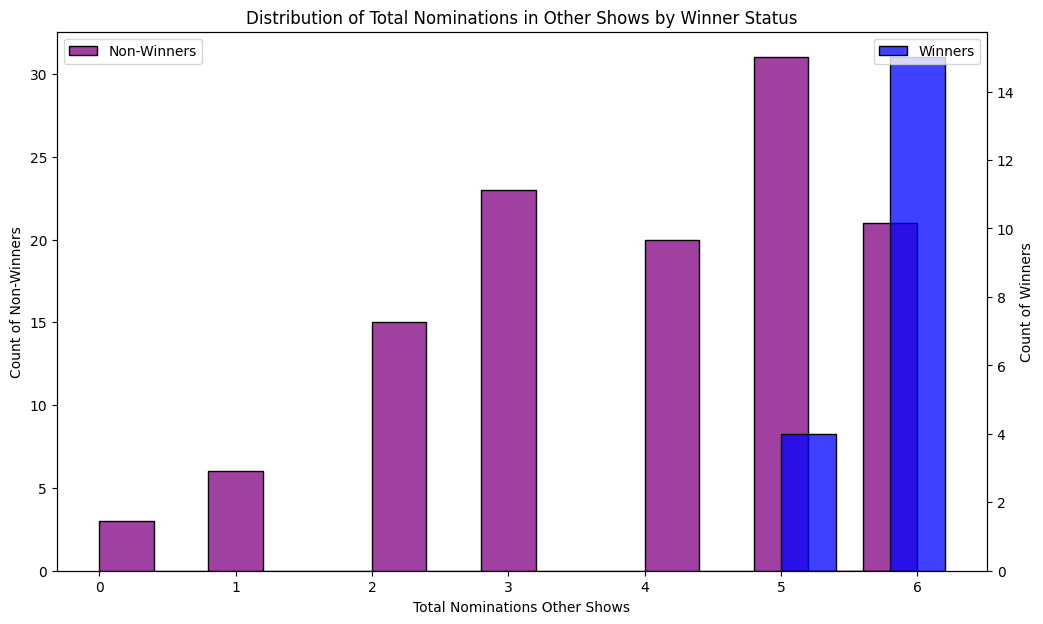

Since the 1.7817448504980117e-07 is less than 5% there is a statistical difference between total nominations between oscar best winners and losers


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statistics

data = pd.read_csv("cleanedBestPicture.csv")
# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize=(12, 7))

# Filter data for winners and non-winners
winners = data[data['Winner'] == 1]
non_winners = data[data['Winner'] == 0]

#Finding the mean and standard deviation
winnerMean = winners['Total Nominations Other Shows'].mean()
print(winnerMean)
loserMean = non_winners['Total Nominations Other Shows'].mean()
print(loserMean)
winnerStd = winners['Total Nominations Other Shows'].std()
print(winnerStd)
loserStd = non_winners['Total Nominations Other Shows'].std()
print(loserStd)

# Determine an appropriate bin width by examining the range of "Total Nominations Other Shows"
bin_width = (data['Total Nominations Other Shows'].max() - data['Total Nominations Other Shows'].min()) / 15  # 15 bins

# Plot for non-winners on primary y-axis
sns.histplot(non_winners, x='Total Nominations Other Shows', color="purple", label='Non-Winners', ax=ax1,
             bins=int((non_winners['Total Nominations Other Shows'].max() - non_winners['Total Nominations Other Shows'].min()) / bin_width),
             binwidth=bin_width)
ax1.set_ylabel('Count of Non-Winners')
ax1.legend(loc='upper left')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot for winners on secondary y-axis
sns.histplot(winners, x='Total Nominations Other Shows', color="blue", label='Winners', ax=ax2,
             bins=int((winners['Total Nominations Other Shows'].max() - winners['Total Nominations Other Shows'].min()) / bin_width),
             binwidth=bin_width)
ax2.set_ylabel('Count of Winners')
ax2.legend(loc='upper right')

# General plot settings
ax1.set_title('Distribution of Total Nominations in Other Shows by Winner Status')
ax1.set_xlabel('Total Nominations Other Shows')
ax1.grid(False)
ax2.grid(False)

# Show the plot
plt.show()


#stats for this data 
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U Test
stat, p_value = mannwhitneyu(winners['Total Nominations Other Shows'], non_winners['Total Nominations Other Shows'], alternative='two-sided')

if (p_value < .05):
    print("Since the", p_value, "is less than 5% there is a statistical difference between total nominations between oscar best winners and losers")





3.6315789473684212
0.5378151260504201
1.7704527454797003
1.0233702708671422


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


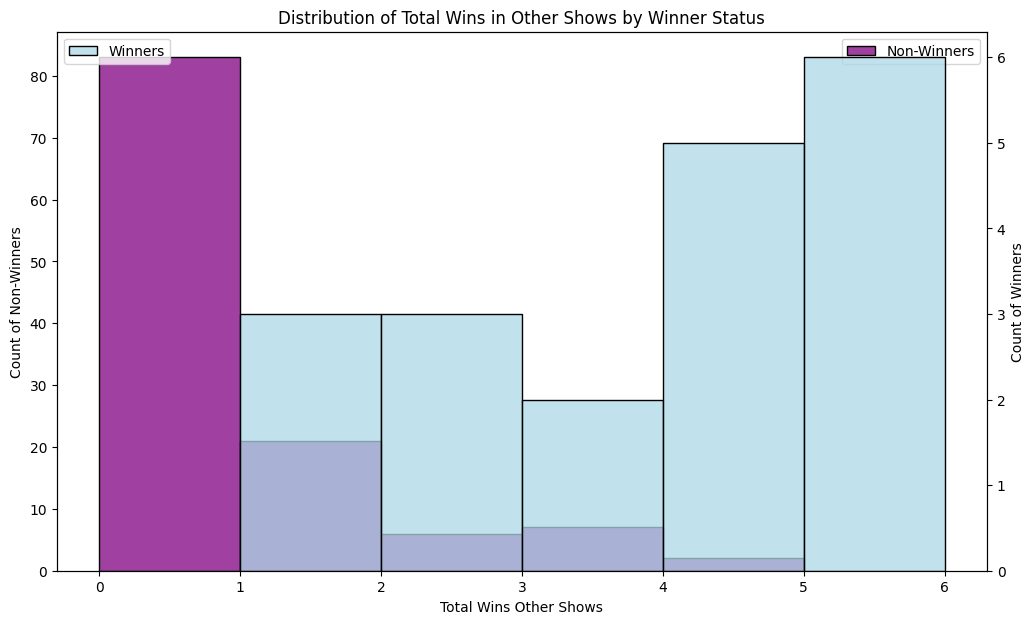

Since the 3.0917797590222813e-12 is less than 5% it is reasonable to conclude that there is a statisitical difference between the winning awards at other shows and winning best picture


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the uploaded CSV file
data = pd.read_csv('cleanedBestPicture.csv')

# Filter data for winners and non-winners
winners = data[data['Winner'] == 1]
non_winners = data[data['Winner'] == 0]

#Finding the mean and standard deviation
winnerMean = winners['Total Wins Other Shows'].mean()
print(winnerMean)
loserMean = non_winners['Total Wins Other Shows'].mean()
print(loserMean)
winnerStd = winners['Total Wins Other Shows'].std()
print(winnerStd)
loserStd = non_winners['Total Wins Other Shows'].std()
print(loserStd)

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize=(12, 7))

# Select lighter colors for better visibility
color_non_winners = "purple" 
color_winners = "lightblue"     

# Plot histogram for non-winners on primary y-axis
sns.histplot(non_winners, x='Total Wins Other Shows', color=color_non_winners, label='Non-Winners', ax=ax1, bins=15, binwidth=1)
ax1.set_ylabel('Count of Non-Winners')
ax1.legend(loc='upper right')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot histogram for winners on secondary y-axis
sns.histplot(winners, x='Total Wins Other Shows', color=color_winners, label='Winners', ax=ax2, bins=15, binwidth=1)
ax2.set_ylabel('Count of Winners')
ax2.legend(loc='upper left')

# General plot settings
ax1.set_title('Distribution of Total Wins in Other Shows by Winner Status')
ax1.set_xlabel('Total Wins Other Shows')
ax1.grid(False)
ax2.grid(False)

# Show the plot
plt.show()

# Perform the Mann-Whitney U Test on "Total Wins Other Shows"
stat_wins, p_value_wins = mannwhitneyu(winners['Total Wins Other Shows'], non_winners['Total Wins Other Shows'], alternative='two-sided')

if (p_value_wins < .05):
    print("Since the", p_value_wins, "is less than 5% it is reasonable to conclude that there is a statisitical difference between the winning awards at other shows and winning best picture")

